In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [3]:
df = pd.read_csv('gridbalance.2016', sep=' ', names=["hour", "imbalance", "consumption", "production","checksum"])

In [4]:
df.head()

,hour,imbalance,consumption,production,checksum
0,0.000000,0.0,0.0,0.0,0.0
1,0.016667,0.0,0.0,0.0,0.0
2,0.033333,0.0,0.0,0.0,0.0
3,0.050000,0.0,0.0,0.0,0.0
4,0.066667,0.0,0.0,0.0,0.0


In [6]:
df.index = pd.DatetimeIndex(start=datetime(2016, 1, 1), end=datetime(2017, 1, 1), closed='left', freq="T")

C:\Users\antoniorubino\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [7]:
df.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:01:00',
               '2016-01-01 00:02:00', '2016-01-01 00:03:00',
               '2016-01-01 00:04:00', '2016-01-01 00:05:00',
               '2016-01-01 00:06:00', '2016-01-01 00:07:00',
               '2016-01-01 00:08:00', '2016-01-01 00:09:00',
               ...
               '2016-12-31 23:50:00', '2016-12-31 23:51:00',
               '2016-12-31 23:52:00', '2016-12-31 23:53:00',
               '2016-12-31 23:54:00', '2016-12-31 23:55:00',
               '2016-12-31 23:56:00', '2016-12-31 23:57:00',
               '2016-12-31 23:58:00', '2016-12-31 23:59:00'],
              dtype='datetime64[ns]', length=527040, freq='T')

In [8]:
df.head()

,hour,imbalance,consumption,production,checksum
2016-01-01 00:00:00,0.000000,0.0,0.0,0.0,0.0
2016-01-01 00:01:00,0.016667,0.0,0.0,0.0,0.0
2016-01-01 00:02:00,0.033333,0.0,0.0,0.0,0.0
2016-01-01 00:03:00,0.050000,0.0,0.0,0.0,0.0
2016-01-01 00:04:00,0.066667,0.0,0.0,0.0,0.0


C:\Users\antoniorubino\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


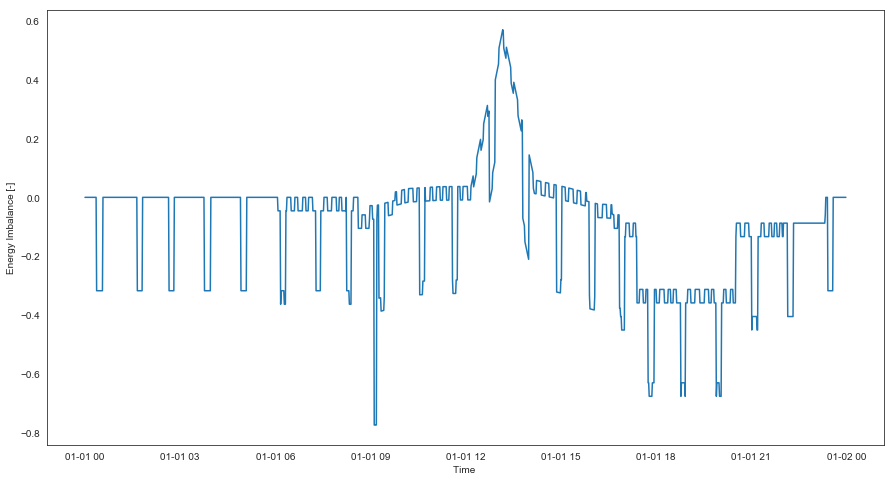

In [9]:
plt.figure(figsize=(15,8))
plt.xlabel('Time ' ) 
plt.ylabel('Energy Imbalance [-]') 
plt.plot(df.loc['2016-1-1':'2016-1-1']['imbalance'], '-',label = 'Real')

In [10]:
imbalance_training = df.loc['2016-1-1':'2016-11-30']['imbalance']

In [11]:
imbalance_total = df['imbalance']

In [12]:
N_train = imbalance_training.index.shape[0]
N_tot = imbalance_total.index.shape[0]
N_sample = 60

In [13]:
N_train

482400

In [14]:
data = [imbalance_training[0:N_train].values]
data = np.transpose(data)

In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled= sc.fit_transform(data)

X_train = []
y_train = []

for i in range(0,N_train-N_sample):
    X_train.append(data_scaled[i:i+N_sample,0])
    y_train.append(data_scaled[N_sample+i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train

array([[0.71438285, 0.71438285, 0.71438285, ..., 0.71438285, 0.71438285,
        0.71438285],
       [0.71438285, 0.71438285, 0.71438285, ..., 0.71438285, 0.71438285,
        0.71438285],
       [0.71438285, 0.71438285, 0.71438285, ..., 0.71438285, 0.71438285,
        0.71438285],
       ...,
       [0.71438285, 0.6447769 , 0.6447769 , ..., 0.71438285, 0.71438285,
        0.71438285],
       [0.6447769 , 0.6447769 , 0.6447769 , ..., 0.71438285, 0.71438285,
        0.71438285],
       [0.6447769 , 0.6447769 , 0.6447769 , ..., 0.71438285, 0.71438285,
        0.71438285]])

In [16]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
111616/482340 [=====>........................] - ETA: 28:04 - loss: 0.0045

KeyboardInterrupt: 